In [1]:
import pandas as pd
import matplotlib.pyplot as plt

input_file = 'predict_30_3_with_reg.csv'
df = pd.read_csv(input_file)
predictor_col = [ 'Predictor 1 Score', 'Predictor 2 Score', 'Predictor 3 Score', 'Predictor 4 Score', 'Predictor 5 Score', 'reg_score']
flag_col = ['1_found_flag', '2_found_flag', '3_found_flag', '4_found_flag', '5_found_flag'] 

df_stat = df[['Score']+predictor_col]

# found %
print df[flag_col].mean()

1_found_flag    0.998675
2_found_flag    0.678762
3_found_flag    0.164744
4_found_flag    0.021931
5_found_flag    0.002985
dtype: float64


C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


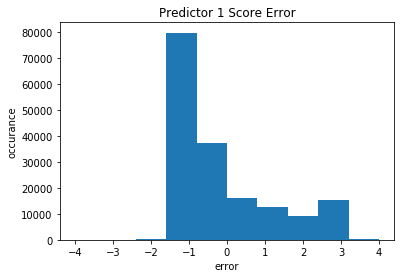

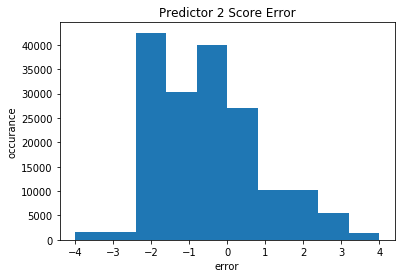

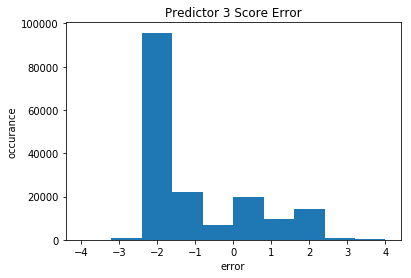

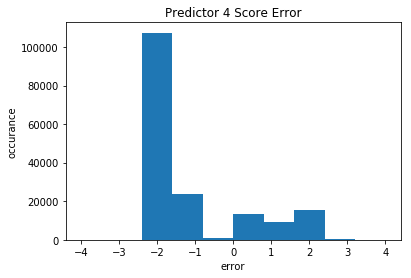

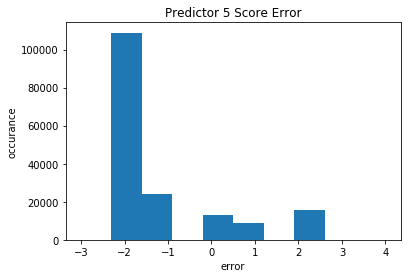

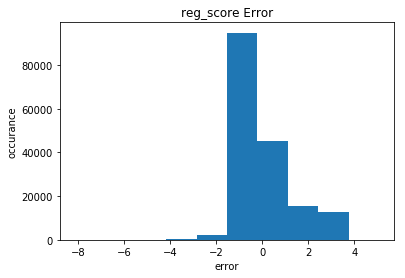

In [2]:
# error
for col in predictor_col:
    df_stat[col] = df_stat[col] - df_stat['Score']


for col in predictor_col:
    plt.hist(df_stat[col])
    plt.title(col+' Error')
    plt.xlabel('error')
    plt.ylabel('occurance')
    plt.show()

In [3]:
# mean sq error
for col in predictor_col:
    df_stat[col] = df_stat[col] ** 2
mean_sq_error = df_stat[predictor_col].sum() / df_stat['Score'].size


#### benchmark - mean square error of test data mean
benchmark =  df['Score'] - df['Score'].mean()
benchmark = benchmark ** 2
benchmark = benchmark.sum() / benchmark.size

#### benchmark - mean square error of train data mean
input_file = 'preprocessed_70'
df_train = pd.read_csv('preprocessed_70.csv')
train_mean = df_train['Score'].mean()

# using train mean
benchmark2 = df['Score'] - train_mean
benchmark2= benchmark2 ** 2
benchmark2 = benchmark2.sum() / benchmark2.size


# summary
summary = pd.DataFrame([benchmark], columns = ['Test data mean MSE'])
dummy = pd.DataFrame([benchmark2], columns = ['Train data mean MSE'])
summary = summary.join(dummy)
dummy = pd.DataFrame([mean_sq_error], columns = [predictor_col])
predictor_col_MSE =  [x.replace('Score','')+' MSE' for x in predictor_col]
dummy.columns = predictor_col_MSE 
summary = summary.join(dummy)
summary

C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Test data mean MSE,Train data mean MSE,Predictor 1 MSE,Predictor 2 MSE,Predictor 3 MSE,Predictor 4 MSE,Predictor 5 MSE,reg_score MSE
0,1.716889,1.716889,1.596403,2.160328,2.917596,3.088705,3.11178,1.448523
